IMPORTS

In [263]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

READ DATA

In [264]:
# Read the CSV file
data = pd.read_csv('C:\\Users\\ticta\\MyRepos\\Epic_3\\datasets\\clean\\combined-data.csv')
# Display the first few rows of the DataFrame
print(data.head())

                Country  1970_co2_total  1971_co2_total  1972_co2_total  \
0                Angola        8.952570        8.538308       10.388519   
1              Anguilla        0.002168        0.002168        0.002264   
2               Albania        4.814516        4.814828        5.498804   
3  United Arab Emirates       19.437564       25.404108       27.718761   
4             Argentina       88.321009       88.765100       90.716408   

   1973_co2_total  1974_co2_total  1975_co2_total  1976_co2_total  \
0       11.372301       11.833761       10.930423        7.317385   
1        0.002109        0.002350        0.002584        0.002434   
2        4.939869        5.319746        5.414438        5.785733   
3       35.806205       35.971039       36.642262       45.538708   
4       93.698462       93.987211       91.411464       96.029610   

   1977_co2_total  1978_co2_total  ...  2012_surface_temperature  \
0       12.057774       14.239234  ...                     0.552  

PROCESS DATA AND PLOT

Row averages of X: 1970_co2_total     75.329194
1971_co2_total     74.480286
1972_co2_total     78.072332
1973_co2_total     82.537992
1974_co2_total     81.152066
1975_co2_total     78.833091
1976_co2_total     83.514740
1977_co2_total     85.683968
1978_co2_total     86.685718
1979_co2_total     89.312549
1980_co2_total     87.046862
1981_co2_total     85.430878
1982_co2_total     82.930168
1983_co2_total     82.806968
1984_co2_total     85.647365
1985_co2_total     86.806041
1986_co2_total     87.348339
1987_co2_total     89.894335
1988_co2_total     93.238335
1989_co2_total     94.789704
1990_co2_total     94.260155
1991_co2_total     94.560186
1992_co2_total     95.426659
1993_co2_total     97.337732
1994_co2_total     99.949015
1995_co2_total    102.111821
1996_co2_total    105.783617
1997_co2_total    108.907761
1998_co2_total    109.408532
1999_co2_total    110.175703
2000_co2_total    113.091302
2001_co2_total    114.018392
2002_co2_total    113.910325
2003_co2_total    116.50

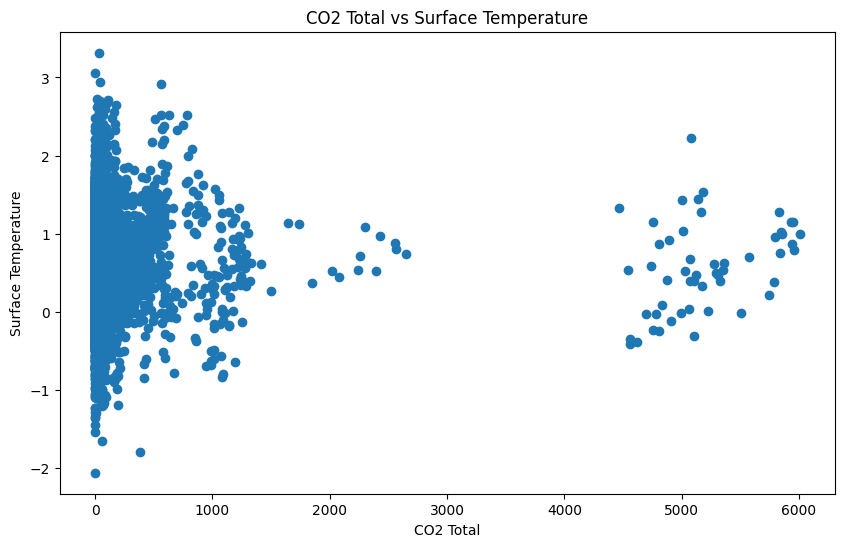

<Figure size 1000x600 with 0 Axes>

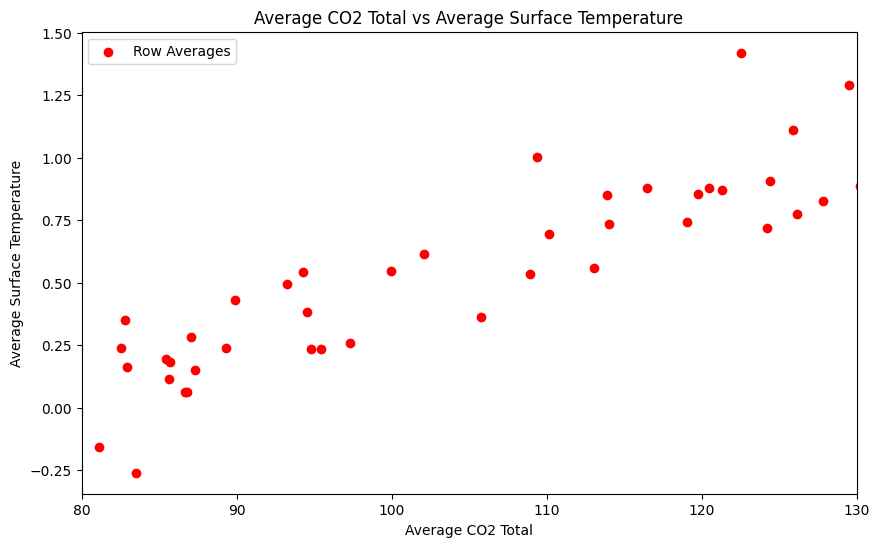

In [265]:
import numpy as np
# Split the data into X and Y
X = data.filter(regex='co2_total')
Y = data.filter(regex='surface_temperature')
X_values = X.values.flatten()
Y_values = Y.values.flatten()

# Calculate row averages
X_column_averages = np.mean(X, axis=0)
Y_column_averages = np.mean(Y, axis=0)

print("Row averages of X:", X_column_averages)
print("Row averages of Y:", Y_column_averages)


plt.figure(figsize=(10, 6))
plt.scatter(X_values, Y_values)
plt.xlabel('CO2 Total')
plt.ylabel('Surface Temperature')
plt.title('CO2 Total vs Surface Temperature')
plt.figure(figsize=(10, 6))

# Plot the row averages
plt.figure(figsize=(10, 6))

# Plot the row averages
plt.scatter(X_column_averages, Y_column_averages, color='r', label='Row Averages')

plt.xlabel('Average CO2 Total')
plt.ylabel('Average Surface Temperature')
plt.title('Average CO2 Total vs Average Surface Temperature')

# Set the limits of the x and y axes
plt.xlim(80, 130)

plt.legend()
plt.show()

TRAIN MODEL

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# First, split the data into a training set and a temporary set using an 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X_column_averages, Y_column_averages, test_size=0.2, random_state=42)

# Then, split the temporary set into a validation set and a test set using a 50-50 split so it is a total 40-40-20 split
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_valid = np.reshape(X_valid, (-1, 1))
X_train = np.reshape(X_train, (-1, 1))
X_test = np.reshape(X_test, (-1, 1))

train = lgb.Dataset(X_train, label=y_train)
test = lgb.Dataset(X_test, label=y_test)
valid = lgb.Dataset(X_valid, label=y_valid)

parameters = {
    "objective": "regression",
    "metric": "l2",
    "boosting_type": "gbdt",
    "verbose": -1,
    "num_leaves": 50,
    "learning_rate": 0.07,
    'max_depth': 50,
    "feature_fraction": 0.75,
}
#Lowest RMSE found:  0.2384376152307734
print(X_train.shape)
print(y_train.shape)

print("X_train dimensions: ", X_train.ndim)
print("y_train dimensions: ", y_train.ndim)

from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# Create a LightGBM regressor
estimator = lgb.LGBMRegressor(objective='regression', metric='l2', boosting_type='gbdt', n_job=-4, device='gpu')

# Define the parameter grid
param_grid = {
        'num_leaves': [ 50, 100, 150],
        'learning_rate': [ 0.05, 0.1],
        'feature_fraction': [ 0.7, 0.8],
        'max_depth': [ 50, 100],
        'min_data_in_leaf': [ 30, 40],
        'bagging_fraction': [ 0.7, 0.8 ],
        'bagging_freq': [ 5, 10],
        'lambda_l1': [ 0.1, 0.2],
        'lambda_l2': [ 0.1, 0.2],
}

# # Initialize a GridSearchCV object that will perform the hyperparameter tuning
# grid = GridSearchCV(estimator, param_grid, verbose=1, cv=3, n_jobs=4)

# # Perform the hyperparameter tuning on your training data
# grid.fit(X_train, y_train)

# # Print the best parameters and the corresponding score
# print("Best parameters found: ", grid.best_params_)
# print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))

(41, 1)
(41,)
X_train dimensions:  2
y_train dimensions:  1


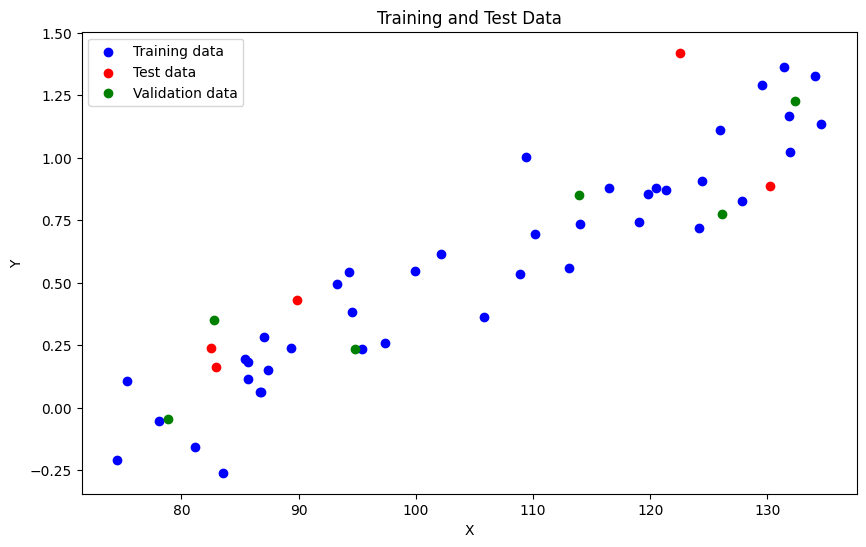

In [267]:
import matplotlib.pyplot as plt

# Assuming your data is 1-dimensional
plt.figure(figsize=(10, 6))

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the test data
plt.scatter(X_valid, y_valid, color='red', label='Test data')

plt.scatter(X_test, y_test, color='green', label='Validation data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Training and Test Data')
plt.legend()
plt.show()

In [268]:
import lightgbm as lgb
model_lgbm = lgb.train(parameters, train, valid_sets=valid,test, num_boost_round=1200)

SyntaxError: positional argument follows keyword argument (4152749169.py, line 2)

Mean squared error evalutation

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)
y_valid_pred = model_lgbm.predict(X_valid)

# Make predictions
y_train_pred = model_lgbm.predict(X_train, num_iteration=model_lgbm.best_iteration)
y_valid_pred = model_lgbm.predict(X_valid, num_iteration=model_lgbm.best_iteration)
y_test_pred = model_lgbm.predict(X_test, num_iteration=model_lgbm.best_iteration)

# Print RMSE
print('The RMSE of prediction on training set is: ', mean_squared_error(y_train, y_train_pred) ** 0.5)
print('The RMSE of prediction on validation set is: ', mean_squared_error(y_valid, y_valid_pred) ** 0.5)
print('The RMSE of prediction on test set is: ', mean_squared_error(y_test, y_test_pred) ** 0.5)

from sklearn.metrics import mean_absolute_error

 # Calculate the mean absolute error

print("Mean Absolute Error (MAE) on training set:", mean_absolute_error(y_train, y_train_pred))
print("Mean Absolute Error (MAE) on validation set:", mean_absolute_error(y_valid, y_valid_pred ))
print("Mean Absolute Error (MAE) on test set:", mean_absolute_error(y_test, y_test_pred))

# Train the model
model_lgbm = lgb.train(parameters, train, valid_sets=[valid], num_boost_round=1200)

# Use the model to predict the test set
y_test_pred = model_lgbm.predict(X_test)

# Evaluate the model on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse}")

The RMSE of prediction on training set is:  0.23790537931153652
The RMSE of prediction on validation set is:  0.24394111931386636
The RMSE of prediction on test set is:  0.18400139323124204
Mean Absolute Error (MAE) on training set: 0.19323420934946026
Mean Absolute Error (MAE) on validation set: 0.16830887414402124
Mean Absolute Error (MAE) on test set: 0.16124331618514806
Test RMSE: 0.18400139323124204
